# Exercise

 - Import data on emotion
 - Train a CNN to classify by emotion (Angry, Disgust, Fear, Happy...)
 - Use Data augmentaion techinques to improve you accuracy
 - Compare your results with DeepFace Library https://pypi.org/project/deepface/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

import cv2 as cv
import pathlib
from PIL import Image

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
url = '/content/gdrive/MyDrive/Advanced Data Analytics UAX/data/4.-CNN/emotions/'
data = pathlib.Path(url)
paths = {
    "Angry": list(data.glob('Angry/*.png')),
    "Disgust": list(data.glob('Disgust/*.png')),
    "Fear": list(data.glob('Fear/*.png')),
    "Happy" : list(data.glob('Happy/*.png')),
    "Neutral" : list(data.glob('Neutral/*.png')),
    "Sad" : list(data.glob('Sad/*.png')),
    "Surprise" : list(data.glob('Surprise/*.png'))
}

labels = {
    "Angry" : 0,
    "Disgust":1,
    "Fear":2,
    "Happy":3,
    "Neutral":4,
    "Sad":5,
    "Surprise":6
}

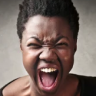

In [14]:
Image.open(str(paths["Angry"][0]))

In [ ]:
X=[]
y=[]

for name, images in paths.items():
    for image in images:
        try:
            print(name)
            image = str(image).strip()
            img = cv.imread(image)
            img_resize = cv.resize(img,(200,200))
            X.append(img_resize)
            y.append(labels[name])

        except:
            print('Except')

X = np.array(X)
y = np.array(y)
X.shape

In [ ]:
for label in y:
  print(label)

Text(0, 0.5, 'Count')

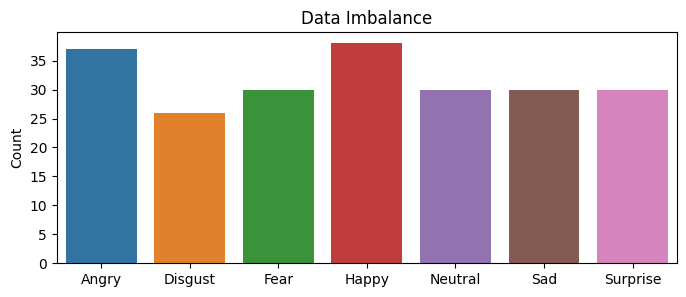

In [55]:
plt.figure(figsize=(8, 3))
g = sns.countplot(x = y)
g.set_xticks(range(len(list(labels.keys()))))
g.set_xticklabels(list(labels.keys()))
plt.title('Data Imbalance')
# plt.xlabel('emotions')
plt.ylabel('Count')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(176, 200, 200, 3)

## Deepface


In [75]:
# !pip install deepface
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [80]:
objs = DeepFace.analyze(img_path = '/content/gdrive/MyDrive/Advanced Data Analytics UAX/data/4.-CNN/emotions/Angry/image 72.png',
        actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]


In [81]:
objs

[{'age': 27,
  'region': {'x': 16, 'y': 19, 'w': 64, 'h': 64},
  'gender': {'Woman': 0.01079259964171797, 'Man': 99.98921155929565},
  'dominant_gender': 'Man',
  'race': {'asian': 7.705220705191722e-05,
   'indian': 0.0026949848263366685,
   'black': 99.99686479531107,
   'white': 7.029602738570613e-08,
   'middle eastern': 3.224475793290273e-08,
   'latino hispanic': 0.000364087075214794},
  'dominant_race': 'black',
  'emotion': {'angry': 70.22527697387659,
   'disgust': 0.021527718874204918,
   'fear': 19.68254979640839,
   'happy': 9.318992116331115,
   'sad': 0.5968885742144077,
   'surprise': 0.11439322460660035,
   'neutral': 0.04037490770499053},
  'dominant_emotion': 'angry'}]